<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/%E4%B8%89%E6%9C%88%E4%BA%8C%E5%8D%81%E4%BA%94%E6%97%A5%E7%AD%86%E8%A8%983.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Concatenating data

In [2]:
# two Series objects to concatenate
s1 = pd.Series(np.arange(0, 3))
s2 = pd.Series(np.arange(5, 8))
s1

0    0
1    1
2    2
dtype: int64

In [3]:
s2

0    5
1    6
2    7
dtype: int64

In [4]:
# concatenate them
pd.concat([s1, s2])

0    0
1    1
2    2
0    5
1    6
2    7
dtype: int64

In [5]:
# create two DataFrame objects to concatenate
# using the same index labels and column names, 
# but different values
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
#df2 has 9 .. 18
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
df1

a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [6]:
df2

a   b   c
0   9  10  11
1  12  13  14
2  15  16  17

In [7]:
# do the concat
pd.concat([df1, df2])

a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
0   9  10  11
1  12  13  14
2  15  16  17

In [8]:
# demonstrate concatenating two DataFrame objects with
# different columns
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3), 
                   columns=['a', 'c', 'd'])
df1

a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [9]:
df2


a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [10]:
# do the concat, NaN's will be filled in for
# the d column for df1 and b column for df2
pd.concat([df1, df2])

a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [11]:
# concat the two objects, but create an index using the
# given keys 
c = pd.concat([df1, df2], keys=['df1', 'df2'])
# note in the labeling of the rows in the output
c

a    b   c     d
df1 0   0  1.0   2   NaN
    1   3  4.0   5   NaN
    2   6  7.0   8   NaN
df2 0   9  NaN  10  11.0
    1  12  NaN  13  14.0
    2  15  NaN  16  17.0

In [12]:
# we can extract the data originating from
# the first or second source DataFrame
c.loc['df2']

a   b   c     d
0   9 NaN  10  11.0
1  12 NaN  13  14.0
2  15 NaN  16  17.0

In [13]:
# concat df1 and df2 along columns
# aligns on row labels, has duplicate columns
pd.concat([df1, df2], axis=1)

a  b  c   a   c   d
0  0  1  2   9  10  11
1  3  4  5  12  13  14
2  6  7  8  15  16  17

In [14]:
# a new DataFrame to merge with df1
# this has two common row labels (2, 3) 
# common columns (a) and one disjoint column
# in each (b in df1 and d in df2)
df3 = pd.DataFrame(np.arange(20, 26).reshape(3, 2), 
                   columns=['a', 'd'], 
                   index=[2, 3, 4])
df3

a   d
2  20  21
3  22  23
4  24  25

In [15]:
# concat them. Alignment is along row labels
# columns first from df1 and then df3, with duplicates.
# NaN filled in where those columns do not exist in the source
pd.concat([df1, df3], axis=1)

a    b    c     a     d
0  0.0  1.0  2.0   NaN   NaN
1  3.0  4.0  5.0   NaN   NaN
2  6.0  7.0  8.0  20.0  21.0
3  NaN  NaN  NaN  22.0  23.0
4  NaN  NaN  NaN  24.0  25.0

In [16]:
# do an inner join instead of outer
# results in one row
pd.concat([df1, df3], axis=1, join='inner')

a  b  c   a   d
2  6  7  8  20  21

In [17]:
# add keys to the columns
df = pd.concat([df1, df2], 
               axis=1,
               keys=['df1', 'df2'])
df

df1       df2        
    a  b  c   a   c   d
0   0  1  2   9  10  11
1   3  4  5  12  13  14
2   6  7  8  15  16  17

In [18]:
# retrieve the data that originated from the 
# DataFrame with key 'df2'
df.loc[:, 'df2']

a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [19]:
# append does a concatenate along axis=0 
# duplicate row index labels can result
df1.append(df2)

a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [20]:
# remove duplicates in the result index by ignoring the 
# index labels in the source DataFrame objects
df1.append(df2, ignore_index=True)

a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
3   9  NaN  10  11.0
4  12  NaN  13  14.0
5  15  NaN  16  17.0

# An overview of merges

In [21]:
# these are our customers
customers = {'CustomerID': [10, 11],
             'Name': ['Mike', 'Marcia'],
             'Address': ['Address for Mike',
                         'Address for Marcia']}
customers = pd.DataFrame(customers)
customers

CustomerID    Name             Address
0          10    Mike    Address for Mike
1          11  Marcia  Address for Marcia

In [22]:
# and these are the orders made by our customers
# they are related to customers by CustomerID
orders = {'CustomerID': [10, 11, 10],
          'OrderDate': [date(2014, 12, 1),
                        date(2014, 12, 1),
                        date(2014, 12, 1)]}
orders = pd.DataFrame(orders)
orders

CustomerID   OrderDate
0          10  2014-12-01
1          11  2014-12-01
2          10  2014-12-01

In [23]:
# merge customers and orders so we can ship the items
customers.merge(orders)

CustomerID    Name             Address   OrderDate
0          10    Mike    Address for Mike  2014-12-01
1          10    Mike    Address for Mike  2014-12-01
2          11  Marcia  Address for Marcia  2014-12-01

In [24]:
# data to be used in the remainder of this section's examples
left_data = {'key1': ['a', 'b', 'c'], 
            'key2': ['x', 'y', 'z'],
            'lval1': [ 0, 1, 2]}
right_data = {'key1': ['a', 'b', 'c'],
              'key2': ['x', 'a', 'z'], 
              'rval1': [ 6, 7, 8 ]}
left = pd.DataFrame(left_data, index=[0, 1, 2])
right = pd.DataFrame(right_data, index=[1, 2, 3])
left

key1 key2  lval1
0    a    x      0
1    b    y      1
2    c    z      2

In [25]:
right

key1 key2  rval1
1    a    x      6
2    b    a      7
3    c    z      8

In [26]:
# demonstrate merge without specifying columns to merge
# this will implicitly merge on all common columns
left.merge(right)

key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [27]:
# demonstrate merge using an explicit column
# on needs the value to be in both DataFrame objects
left.merge(right, on='key1')

key1 key2_x  lval1 key2_y  rval1
0    a      x      0      x      6
1    b      y      1      a      7
2    c      z      2      z      8

In [28]:
# merge explicitly using two columns
left.merge(right, on=['key1', 'key2'])

key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [29]:
# join on the row indices of both matrices
pd.merge(left, right, left_index=True, right_index=True)

key1_x key2_x  lval1 key1_y key2_y  rval1
1      b      y      1      a      x      6
2      c      z      2      b      a      7

# Specifying the join semantics of a merge operation

In [30]:
# outer join, merges all matched data, 
# and fills unmatched items with NaN
left.merge(right, how='outer')

key1 key2  lval1  rval1
0    a    x    0.0    6.0
1    b    y    1.0    NaN
2    c    z    2.0    8.0
3    b    a    NaN    7.0

In [31]:
# left join, merges all matched data, and only fills unmatched 
# items from the left dataframe with NaN filled for the 
# unmatched items in the result 
# rows with labels 0 and 2 
# match on key1 and key2 the row with label 1 is from left

left.merge(right, how='left')

key1 key2  lval1  rval1
0    a    x      0    6.0
1    b    y      1    NaN
2    c    z      2    8.0

In [32]:
# right join, merges all matched data, and only fills unmatched
# item from the right with NaN filled for the unmatched items
# in the result 
# rows with labels 0 and 2 match on key1 and key2
# the row with label 1 is from right
left.merge(right, how='right')

key1 key2  lval1  rval1
0    a    x    0.0      6
1    b    a    NaN      7
2    c    z    2.0      8

In [33]:
# join left with right (default method is outer)
# and since these DataFrame objects have duplicate column names
# we just specify lsuffix and rsuffix
left.join(right, lsuffix='_left', rsuffix='_right')

key1_left key2_left  lval1 key1_right key2_right  rval1
0         a         x      0        NaN        NaN    NaN
1         b         y      1          a          x    6.0
2         c         z      2          b          a    7.0

In [35]:
# join left with right with an inner join
left.join(right, lsuffix='_left', rsuffix='_right', how='inner')

key1_left key2_left  lval1 key1_right key2_right  rval1
1         b         y      1          a          x      6
2         c         z      2          b          a      7

# Pivoting

In [37]:
# read in accelerometer data
sensor_readings = pd.read_csv("/content/constituents.csv")
sensor_readings

Symbol                    Name                  Sector
0      MMM              3M Company             Industrials
1      AOS         A.O. Smith Corp             Industrials
2      ABT     Abbott Laboratories             Health Care
3     ABBV             AbbVie Inc.             Health Care
4      ACN           Accenture plc  Information Technology
..     ...                     ...                     ...
500    XYL              Xylem Inc.             Industrials
501    YUM         Yum! Brands Inc  Consumer Discretionary
502    ZBH  Zimmer Biomet Holdings             Health Care
503   ZION           Zions Bancorp              Financials
504    ZTS                  Zoetis             Health Care

[505 rows x 3 columns]

In [40]:
# extract X-axis readings
sensor_readings[sensor_readings['Name'] == 'Symbl']

Empty DataFrame
Columns: [Symbol, Name, Sector]
Index: []

In [63]:
 # pivot the data.  Interval becomes the index, the columns are
# the current axes values, and use the readings as values
 
                     
                       

# Stacking using non-hierarchical indexes

In [48]:
# simple DataFrame with one column
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
df

a
two  1
one  2

In [49]:
# simple DataFrame with one column
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
df

a
two  1
one  2

In [56]:
# lookup one / a using just the index via a tuple
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
df

a
two  1
one  2

In [51]:
# DataFrame with two columns
df = pd.DataFrame({'a': [1, 2],
                   'b': [3, 4]}, 
                  index={'one', 'two'})
df

a  b
two  1  3
one  2  4

In [52]:
# push the two columns into a single level of the index
stacked2 = df.stack()
stacked2

two  a    1
     b    3
one  a    2
     b    4
dtype: int64

In [57]:
# lookup value with index of one / b
stacked2[('one', 'b')]

4

# Unstacking using hierarchical indexes

In [66]:
# make two copies of the sensor data, one for each user
user1 = sensor_readings.copy()
user2 = sensor_readings.copy()
# add names to the two copies
user1['who'] = 'MFST'
user2['who'] = 'AAPL'
user1 
user2 

Symbol                    Name  \
0      MMM              3M Company   
1      AOS         A.O. Smith Corp   
2      ABT     Abbott Laboratories   
3     ABBV             AbbVie Inc.   
4      ACN           Accenture plc   
..     ...                     ...   
500    XYL              Xylem Inc.   
501    YUM         Yum! Brands Inc   
502    ZBH  Zimmer Biomet Holdings   
503   ZION           Zions Bancorp   
504    ZTS                  Zoetis   

                     Sector   who  
0               Industrials  AAPL  
1               Industrials  AAPL  
2               Health Care  AAPL  
3               Health Care  AAPL  
4    Information Technology  AAPL  
..                      ...   ...  
500             Industrials  AAPL  
501  Consumer Discretionary  AAPL  
502             Health Care  AAPL  
503              Financials  AAPL  
504             Health Care  AAPL  

[505 rows x 4 columns]

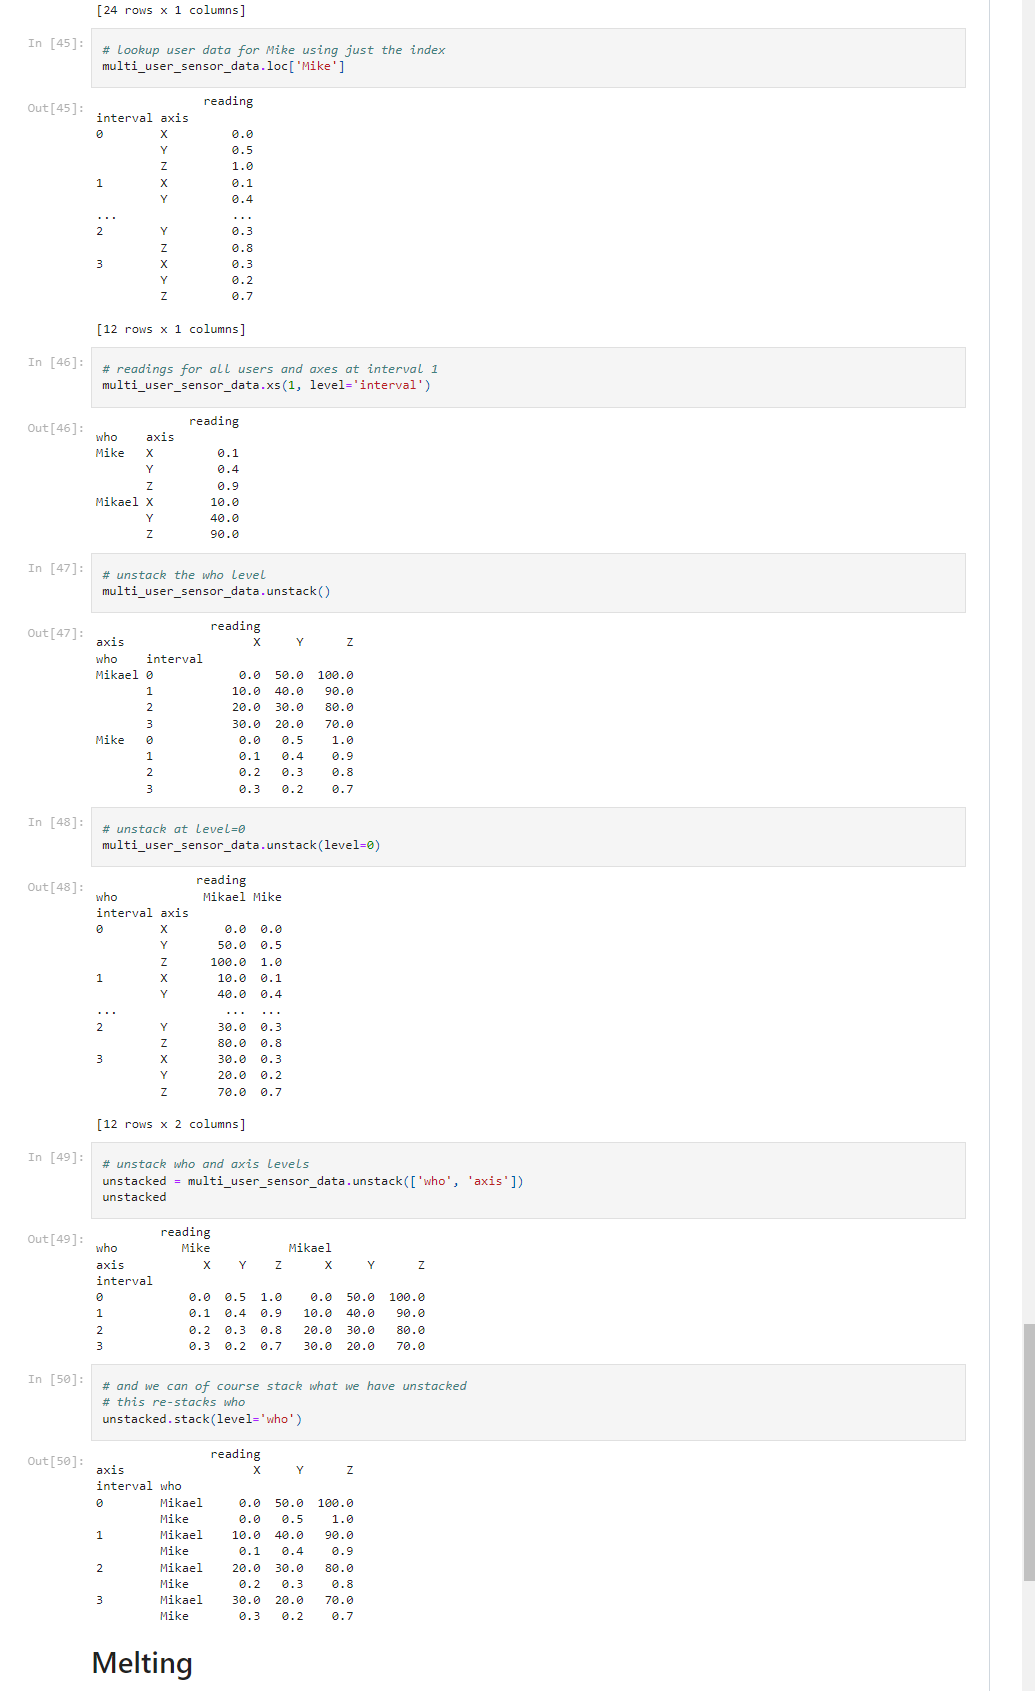

NameError: ignored

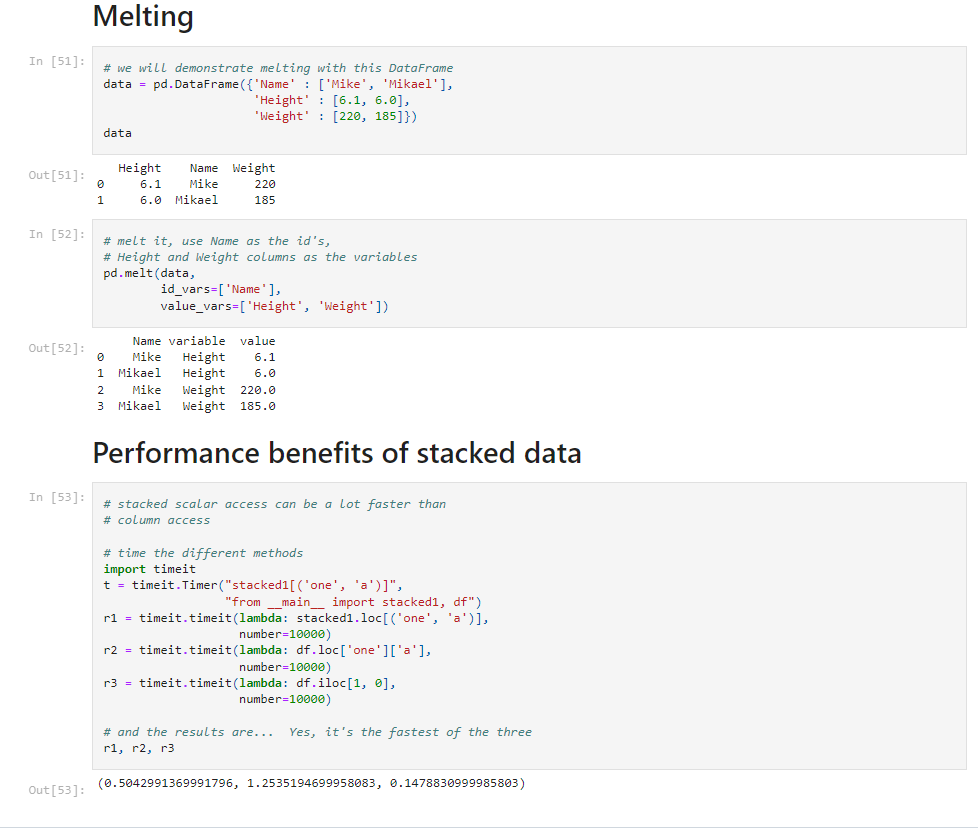